In [1]:
import numpy as np
import pandas as pd
import os

project_path = os.path.abspath(os.getcwd())
project_path = project_path.rsplit('\\',1)[0]
data_path = project_path + "\\data\\"

In [2]:
os.chdir(data_path)
dfcat = pd.read_csv("2024-01-20_big_entropy_3AOIs_30sec.csv")
dfcat

,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy
0,big,58,H,0,0.578192,1.053555
1,big,58,H,10,0.262538,0.748415
2,big,58,H,20,0.684517,0.892933
3,big,58,H,30,0.829818,0.943968
4,big,58,H,40,0.824807,1.015515
...,...,...,...,...,...,...
22955,big,441,H,770,0.981946,0.481652
22956,big,441,H,780,0.982781,0.518746
22957,big,441,H,790,0.922356,0.477383
22958,big,441,H,800,0.763782,0.640062


In [3]:
dfcat['transition_entropy'] = dfcat['transition_entropy'].astype(str).replace('0.0',np.nan)
dfcat['stationary_entropy'] = dfcat['stationary_entropy'].astype(str).replace('0.0',np.nan)
print(len(dfcat))
dfcat = dfcat.dropna()
print(len(dfcat))
dfcat['transition_entropy'] = dfcat['transition_entropy'].replace('-0.0', '0.0').astype(float)
dfcat['stationary_entropy'] = dfcat['stationary_entropy'].replace('-0.0', '0.0').astype(float)
dfbig = dfcat[dfcat['Start']<820]

22960
21360


C:\Users\HIBVR\AppData\Local\Temp\ipykernel_18024\2043223299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['transition_entropy'] = dfcat['transition_entropy'].replace('-0.0', '0.0').astype(float)
C:\Users\HIBVR\AppData\Local\Temp\ipykernel_18024\2043223299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['stationary_entropy'] = dfcat['stationary_entropy'].replace('-0.0', '0.0').astype(float)


In [4]:
print(dfbig['transition_entropy'].value_counts())
print(dfbig['stationary_entropy'].value_counts())

transition_entropy
0.000000    5119
0.636514      26
0.693147      13
0.562335       8
0.410116       5
            ... 
0.601559       1
0.612946       1
0.553358       1
0.054815       1
0.426254       1
Name: count, Length: 15903, dtype: int64
stationary_entropy
0.000000    872
0.693147      8
0.593086      3
0.678659      3
0.642591      3
           ... 
0.686461      1
0.614989      1
0.702925      1
0.725203      1
0.553366      1
Name: count, Length: 19796, dtype: int64


In [5]:
os.chdir(data_path + "\\questionnaire\\")
dfs = pd.read_csv('big_szenarios.csv', sep=";", decimal=',')
dfs.columns = ['Start', 'End','event','name']
dfs['event_agg'] = np.where(dfs['event'].isin(['teacher explanation', 'teacher explanation + nodding', 'reading + teacher explanation', 'teacher explanation + question']), 0, 1)
dfs = dfs.rename(columns={'Start':'Start_float'})
dfs['Start'] = ((dfs['Start_float'] /10).round(0))*10
df = dfbig.merge(dfs[['Start', 'event_agg']], on='Start', how='left').reset_index()
len(df)
dfs.to_csv('big_szenarios_int_time.csv',index=False)

In [6]:
dff = df.dropna(subset='event_agg', ignore_index=True)
len(dff)
dff

,index,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,event_agg
0,5,big,58,H,50,0.908962,0.872306,1.0
1,6,big,58,H,60,0.891869,0.843828,1.0
2,7,big,58,H,70,0.831731,0.883246,1.0
3,8,big,58,H,80,0.684636,0.805447,1.0
4,9,big,58,H,90,0.556018,0.803272,1.0
...,...,...,...,...,...,...,...,...
19188,21355,big,441,H,770,0.981946,0.481652,0.0
19189,21356,big,441,H,780,0.982781,0.518746,0.0
19190,21357,big,441,H,790,0.922356,0.477383,0.0
19191,21358,big,441,H,800,0.763782,0.640062,0.0


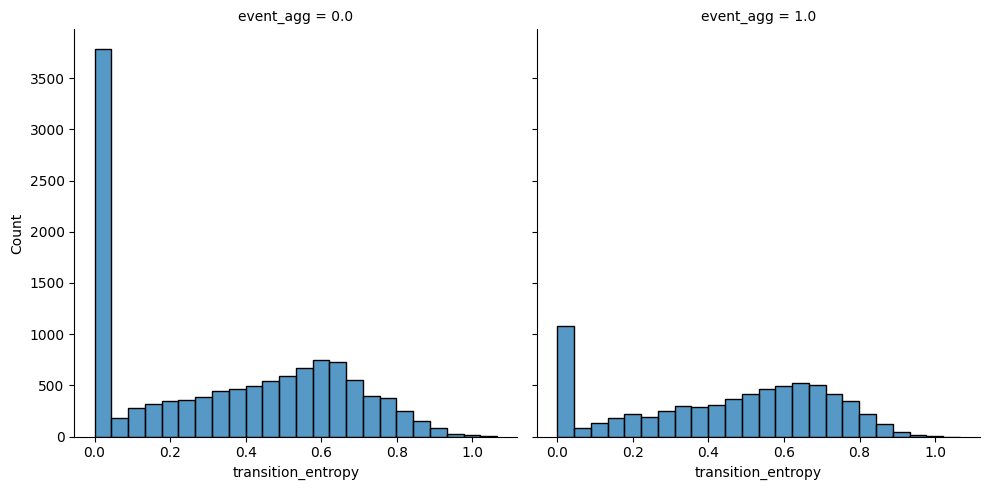

In [7]:
import seaborn as sns
sns.displot(data=dff, x='transition_entropy', col='event_agg')

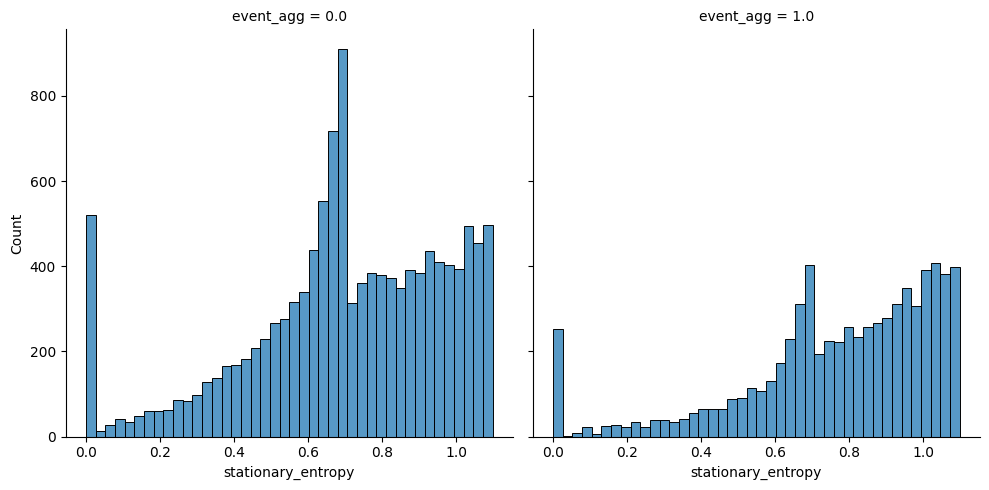

In [8]:
sns.displot(data=dff, x='stationary_entropy', col='event_agg')

In [9]:
print('Transition Entropy')
dff.groupby('event_agg')['transition_entropy'].describe()

Transition Entropy


,count,mean,std,min,25%,50%,75%,max
event_agg,,,,,,,,
0.0,12186.0,0.340279,0.287340,0.0,0.000000,0.353455,0.595110,1.065665
1.0,6953.0,0.443012,0.266901,0.0,0.229429,0.499317,0.659879,1.015756


In [10]:
print('Stationary Entropy')
dff.groupby('event_agg')['stationary_entropy'].describe()

Stationary Entropy


,count,mean,std,min,25%,50%,75%,max
event_agg,,,,,,,,
0.0,12186.0,0.699826,0.271263,0.0,0.562102,0.697896,0.917134,1.098525
1.0,6953.0,0.771566,0.263668,0.0,0.651129,0.822577,0.981183,1.098518


In [11]:
dff['Condition_hand'] = np.where(dff['Condition'].isin(['A', 'E', 'I','M']), 20, 
                            np.where(dff['Condition'].isin(['B', 'F', 'J', 'N']), 35,
                                     np.where(dff['Condition'].isin(['C', 'G', 'K', 'O']), 65, 80)))
dff['Condition_hand'].value_counts()                                  

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_18024\1471764755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Condition_hand'] = np.where(dff['Condition'].isin(['A', 'E', 'I','M']), 20,


Condition_hand
80    5457
20    5099
35    4476
65    4161
Name: count, dtype: int64

In [12]:
dff['NA'] = dff['transition_entropy'].isnull()
x = dff.groupby('ID')['NA'].sum().sort_values(ascending=False)
x.head(20)
xd = x[x<=14] #drop ases with more tan 20% missings
id_lst = xd.index.to_list()

dfd = dff[dff['ID'].isin(id_lst)]
len(dfd)
dfd = dfd.drop(columns=['NA'])
dfd['Condition_hand'].value_counts() 

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_18024\640795168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['NA'] = dff['transition_entropy'].isnull()


Condition_hand
80    5457
20    5099
35    4476
65    4161
Name: count, dtype: int64

In [13]:
len(dfd['Start'].unique())

74

In [14]:
dfg = dfd[['ID','transition_entropy', 'stationary_entropy']].groupby('ID').mean().reset_index()
dfg.columns = ['ID', 'trans_mean', 'stat_mean']
dfm = dfd.merge(dfg, on='ID', how='left')
dfm['transition_entropy_c'] = dfm['transition_entropy']-dfm['trans_mean']
dfm['stationary_entropy_c'] = dfm['stationary_entropy']-dfm['stat_mean']
dfm

,index,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,event_agg,Condition_hand,trans_mean,stat_mean,transition_entropy_c,stationary_entropy_c
0,5,big,58,H,50,0.908962,0.872306,1.0,80,0.539583,0.661372,0.369379,0.210934
1,6,big,58,H,60,0.891869,0.843828,1.0,80,0.539583,0.661372,0.352285,0.182457
2,7,big,58,H,70,0.831731,0.883246,1.0,80,0.539583,0.661372,0.292148,0.221875
3,8,big,58,H,80,0.684636,0.805447,1.0,80,0.539583,0.661372,0.145052,0.144075
4,9,big,58,H,90,0.556018,0.803272,1.0,80,0.539583,0.661372,0.016435,0.141900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188,21355,big,441,H,770,0.981946,0.481652,0.0,80,0.280186,0.232365,0.701760,0.249287
19189,21356,big,441,H,780,0.982781,0.518746,0.0,80,0.280186,0.232365,0.702596,0.286381
19190,21357,big,441,H,790,0.922356,0.477383,0.0,80,0.280186,0.232365,0.642170,0.245017
19191,21358,big,441,H,800,0.763782,0.640062,0.0,80,0.280186,0.232365,0.483596,0.407696


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_variables(df, var):
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(12,6)})
    sns.set_theme(style="darkgrid")
    y = df[var]
    plt.title(var)

    ax = sns.lineplot(x="Start", y=y,
             data=df, markers="o")
    ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


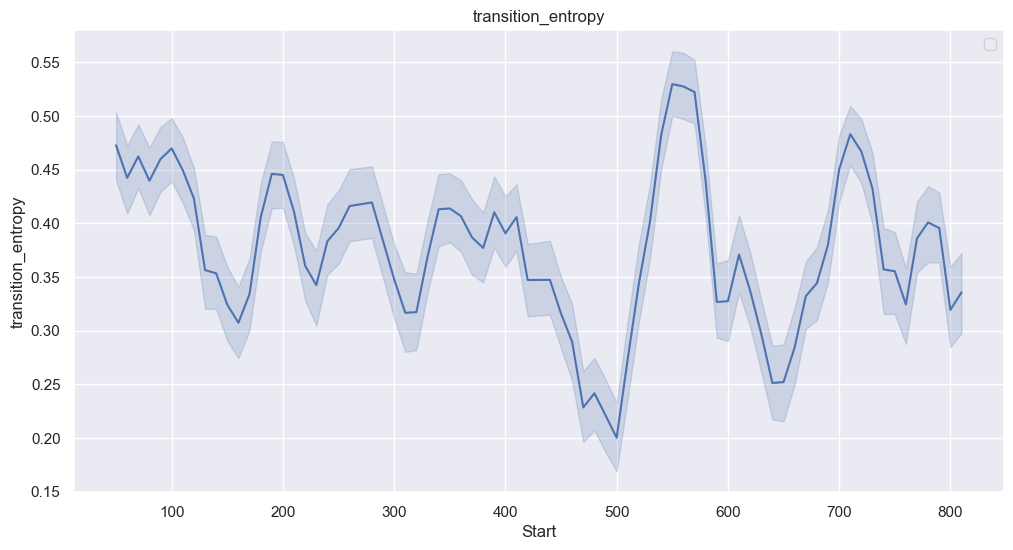

In [16]:
plot_variables(dfm, 'transition_entropy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


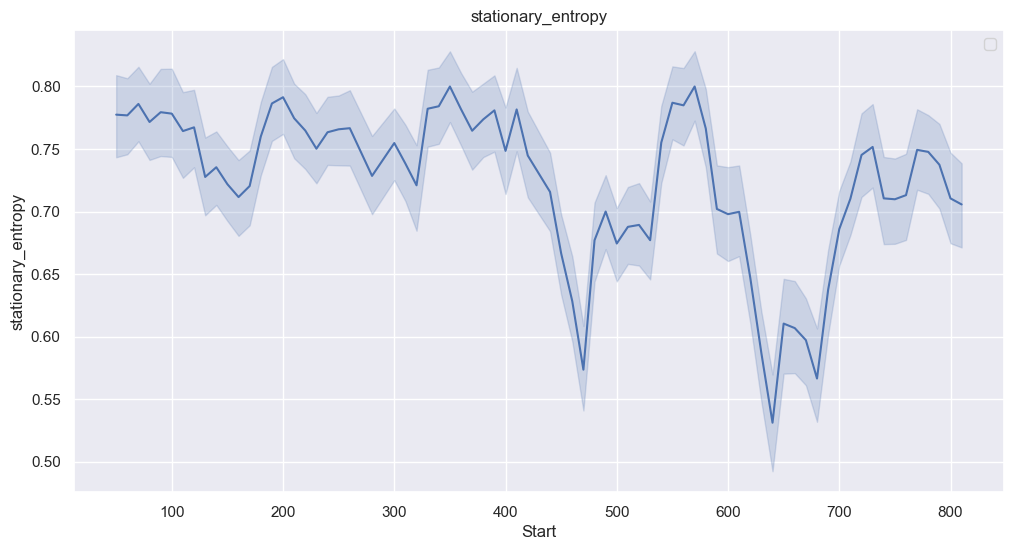

In [17]:
plot_variables(dfm, 'stationary_entropy')

In [18]:
def plot_variables_cond(df, var):
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(12,6)})
    sns.set_theme(style="darkgrid")
    y = df[var]
    plt.title(var)

    ax = sns.lineplot(x="Start", y=y, hue="Condition_hand",
             data=df,style='Condition_hand', markers=["o", "o"])
    
    ax.legend()

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_18024\682263831.py:8: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(x="Start", y=y, hue="Condition_hand",


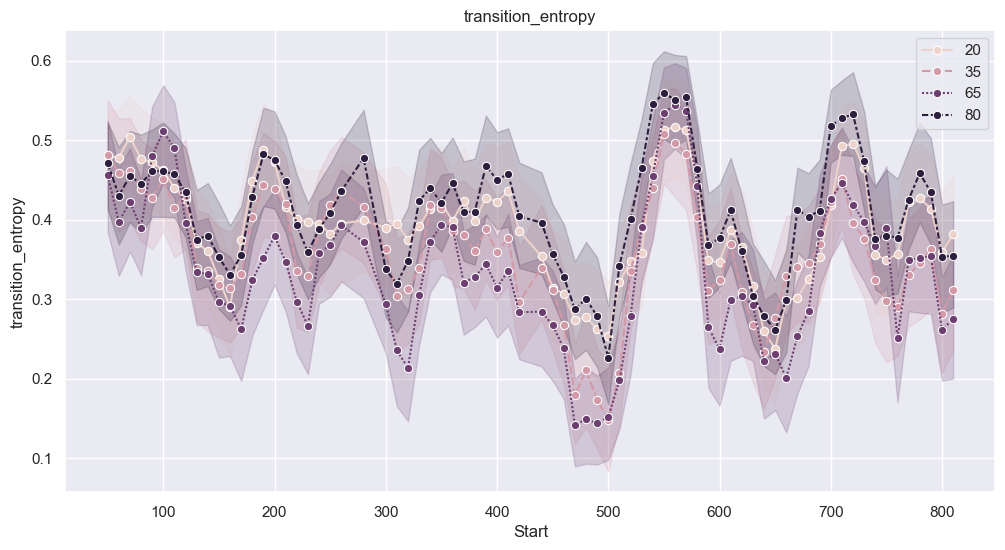

In [19]:
plot_variables_cond(dfm, 'transition_entropy')

C:\Users\HIBVR\AppData\Local\Temp\ipykernel_18024\682263831.py:8: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(x="Start", y=y, hue="Condition_hand",


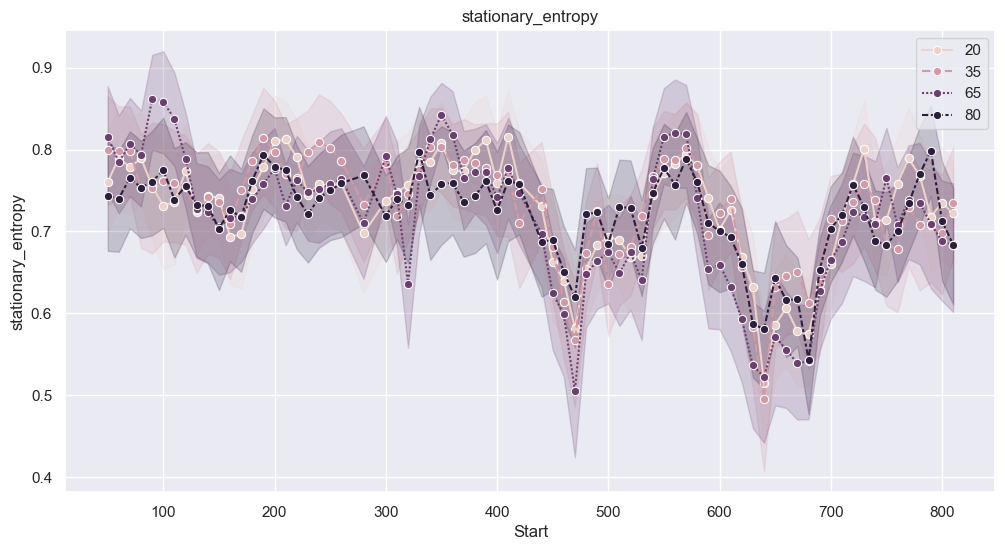

In [20]:
plot_variables_cond(dfm, 'stationary_entropy')

In [21]:
os.chdir(data_path + "\\big_hand_raising\\")
dfm.to_csv("2024-01-20_big_entropy_events_with_zero_3AOIS_30sec.csv", index=False)

## Predcition Task

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [23]:
dfm['Start_int'] = (dfm['Start']-50)/10
print(len(dfm))

19193


In [24]:
df = dfm.dropna()
y = df['event_agg'].replace(0,-1)
X = df[['transition_entropy_c','stationary_entropy_c']]

In [25]:
y_pred_lst = list()
f1_lst = list()
conf = np.zeros([2,2])
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_lst.append(y_pred)
    f1_lst.append(f1_score(y_test, y_pred, average='weighted'))
    conf += confusion_matrix(y_test, y_pred)

In [26]:
np.round(conf/(conf.sum()),2)

array([[0.58, 0.05],
       [0.3 , 0.06]])

In [27]:
np.mean(f1_lst)

0.586067334168881

In [28]:
dfe = pd.DataFrame()

for id in dfm['ID'].unique():
    dfsub = dfm[dfm['ID']==id]
    
    event_lst = list()
    for i in range(len(dfsub)-3):
        event = dfsub['event_agg'].iloc[i:i+3].sum()
        event_lst.append(event)
    dfsub = dfsub.iloc[:-3,:]
    dfsub['event_int'] = event_lst
    dfe = pd.concat([dfe, dfsub], axis=0)

In [36]:
dfe['event_new'] = np.where(dfe['event_int'].isin([3,2]), 1,0)
dfe

,index,Dataset,ID,Condition,Start,transition_entropy,stationary_entropy,event_agg,Condition_hand,trans_mean,stat_mean,transition_entropy_c,stationary_entropy_c,Start_int,event_int,event_new
0,5,big,58,H,50,0.908962,0.872306,1.0,80,0.539583,0.661372,0.369379,0.210934,0.0,3.0,1
1,6,big,58,H,60,0.891869,0.843828,1.0,80,0.539583,0.661372,0.352285,0.182457,1.0,3.0,1
2,7,big,58,H,70,0.831731,0.883246,1.0,80,0.539583,0.661372,0.292148,0.221875,2.0,3.0,1
3,8,big,58,H,80,0.684636,0.805447,1.0,80,0.539583,0.661372,0.145052,0.144075,3.0,3.0,1
4,9,big,58,H,90,0.556018,0.803272,1.0,80,0.539583,0.661372,0.016435,0.141900,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,21352,big,441,H,720,0.000000,0.000000,1.0,80,0.280186,0.232365,-0.280186,-0.232365,67.0,2.0,1
19186,21353,big,441,H,730,0.000000,0.000000,1.0,80,0.280186,0.232365,-0.280186,-0.232365,68.0,1.0,0
19187,21354,big,441,H,760,0.000000,0.000000,0.0,80,0.280186,0.232365,-0.280186,-0.232365,71.0,0.0,0
19188,21355,big,441,H,770,0.981946,0.481652,0.0,80,0.280186,0.232365,0.701760,0.249287,72.0,0.0,0


In [55]:
df = dfe.dropna()
y = df['event_new'].replace(0,-1)
X = df[['transition_entropy_c','stationary_entropy_c']]

In [56]:
y_pred_lst = list()
f1_lst = list()
conf = np.zeros([2,2])
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_lst.append(y_pred)
    f1_lst.append(f1_score(y_test, y_pred, average='weighted'))
    conf += confusion_matrix(y_test, y_pred)

In [57]:
np.round(conf/(conf.sum()),2)

array([[0.52, 0.09],
       [0.28, 0.11]])

In [58]:
conf/50

array([[1915. ,  314. ],
       [1026.1,  405.9]])

In [59]:
np.mean(f1_lst)

0.5985460725318846

In [60]:
df['event_new'].value_counts()

event_new
0    11142
1     7159
Name: count, dtype: int64

--- End